In [46]:
import sys
sys.path.append(".")

In [47]:
import numpy as np
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3
import matplotlib.pylab as plt
from pathlib import Path
from tensorflow.keras import layers

#from PlayingCardsGenerator import CardsDataGenerator
import datetime

In [48]:
model_name_it = "Outputs/Efficient_net_B4_it_52.h5"

In [49]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [50]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 20)

In [51]:
monitor_it = tf.keras.callbacks.ModelCheckpoint(model_name_it, monitor='val_loss',\
                                             verbose=1,save_best_only=True,\
                                             save_weights_only=False,\
                                             mode='min')

In [10]:
def scheduler(epoch, lr):
    if epoch%30 == 0 and epoch!= 0:
        lr = lr/2
    return lr

In [11]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose = 0)

In [12]:
gen_params = {"featurewise_center":False,\
              "samplewise_center":False,\
              "featurewise_std_normalization":False,\
              "samplewise_std_normalization":False,\
              "rotation_range":90,\
              "width_shift_range":0.3,\
              "height_shift_range":0.3, \
              "shear_range":0.3, \
              "zoom_range":0.3,\
              "vertical_flip":True, \
              "brightness_range": (0.2, 2)}

In [13]:
generator = ImageDataGenerator(**gen_params, validation_split=0.2,  preprocessing_function = tf.keras.applications.efficientnet.preprocess_input)

In [58]:
bs = 16 # batch size

In [15]:
path = Path("dataset/")

In [16]:
img_height = 380
img_width = 380

In [17]:
classes_names = ["2_clubs","2_diamonds","2_hearts","2_spades",\
               "3_clubs","3_diamonds","3_hearts","3_spades",\
               "4_clubs","4_diamonds","4_hearts","4_spades",\
               "5_clubs","5_diamonds","5_hearts","5_spades",\
               "6_clubs","6_diamonds","6_hearts","6_spades",\
               "7_clubs","7_diamonds","7_hearts","7_spades",\
               "8_clubs","8_diamonds","8_hearts","8_spades",\
               "9_clubs","9_diamonds","9_hearts","9_spades",\
               "10_clubs","10_diamonds","10_hearts","10_spades",\
               "ace_clubs","ace_diamonds","ace_hearts","ace_spades",\
               "jack_clubs","jack_diamonds","jack_hearts","jack_spades",\
               "king_clubs","king_diamonds","king_hearts","king_spades",\
               "queen_clubs","queen_diamonds","queen_hearts","queen_spades"]

In [18]:
train_generator = generator.flow_from_directory(
    directory = path,
    target_size=(img_height, img_width),
    batch_size=bs,
    class_mode="categorical",
    subset='training',
    shuffle = True,
    interpolation="nearest",
    seed=42,
    classes=classes_names) # set as training data

Found 24952 images belonging to 52 classes.


In [19]:
validation_generator = generator.flow_from_directory(
    directory = path,
    target_size=(img_height, img_width),
    batch_size=bs,
    class_mode="categorical",
    subset='validation',
    interpolation="nearest",
    seed=42,
    classes=classes_names) # set as validation data

Found 6206 images belonging to 52 classes.


In [21]:
# Defining the model

trainable_flag = True
include_top_flag = False
weigths_value = 'imagenet'

if trainable_flag:
    include_top_flag = True
    weigths_value = None
else:
    include_top_flag = False
    weigths_value = 'imagenet'    


In [22]:
print(weigths_value)
print(include_top_flag)
print(trainable_flag)


None
True
True


In [23]:
inputs = layers.Input(shape=(img_height,img_width,3))
outputs = tf.keras.applications.EfficientNetB4(include_top=include_top_flag, weights=weigths_value,drop_connect_rate=0.3, classes=len(classes_names))(inputs)
model = tf.keras.Model( inputs,  outputs)

In [24]:
print("Initial Training Model")
print(model.summary())

Initial Training Model
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 380, 380, 3)]     0         
                                                                 
 efficientnetb4 (Functional)  (None, 52)               17767059  
                                                                 
Total params: 17,767,059
Trainable params: 17,641,852
Non-trainable params: 125,207
_________________________________________________________________
None


In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3), #
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
#odel = tf.keras.models.load_model(model_name_it)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 380, 380, 3)]     0         
                                                                 
 efficientnetb4 (Functional)  (None, 52)               17767059  
                                                                 
Total params: 17,767,059
Trainable params: 17,641,852
Non-trainable params: 125,207
_________________________________________________________________


In [ ]:
history_it = model.fit(train_generator, epochs=1000, verbose = 1, \
                       workers=8, validation_data = (validation_generator),  callbacks= [monitor_it,early_stop,lr_schedule,tensorboard_callback])

In [134]:
model.save('final_it_EfficientNetB5_52_last_model.h5')
#np.save('efficientNetB0_history_96_v2.npy',history_it.history)


In [ ]:
#model = tf.keras.models.load_model('Outputs\Efficient_net_B0_it_52.h5')
#model.save('final_it_EfficientNetB0_52_96_percent_v2_best_model.h5')

In [619]:
gen_params = {"featurewise_center":False,\
              "samplewise_center":False,\
              "featurewise_std_normalization":False,\
              "samplewise_std_normalization":False,\
              "rotation_range":90,\
              "width_shift_range":0.2,\
              "height_shift_range":0.2, \
              "shear_range":0.2, \
              "zoom_range":0.2,\
              "vertical_flip":True,\
              "brightness_range": (0.1, 2)}

In [620]:
generator = ImageDataGenerator(**gen_params, validation_split=0.2,  preprocessing_function = tf.keras.applications.efficientnet.preprocess_input)

In [27]:
train_generator = generator.flow_from_directory(
    directory = path,
    target_size=(img_height, img_width),
    batch_size=bs,
    class_mode="categorical",
    subset='training',
    shuffle = True,
    interpolation="nearest",
    seed=42,
    classes=classes_names) # set as training data

Found 24952 images belonging to 52 classes.


In [622]:
validation_generator = generator.flow_from_directory(
    directory = path,
    target_size=(img_height, img_width),
    batch_size=bs,
    class_mode="categorical",
    subset='validation',
    interpolation="nearest",
    seed=42,
    classes=classes_names) # set as validation data

Found 6206 images belonging to 52 classes.


In [616]:
from keras import backend as K
K.set_value(model.optimizer.learning_rate, 1e-6)

In [ ]:
history_ft = model.fit(train_generator, epochs=10, verbose = 1, \
                       workers=8, validation_data = (validation_generator),  callbacks= [monitor_it,early_stop,lr_schedule,tensorboard_callback])

In [ ]:
#model.save('final_ft_EfficientNetB0_52_96_percent.h5')
np.save('efficientNetB0_history_96.npy',history_it.history)


# Load

In [ ]:
#model = tf.keras.models.load_model('final_it_EfficientNetB0_52_90_percent.h5')

In [100]:
#model = tf.keras.models.load_model('Outputs/Efficient_net_B0_it_52.h5')
model = tf.keras.models.load_model('BEST_MODEL_B4/Efficientnet_B4_it_52_94percent.h5')


In [ ]:
%tensorboard --logdir 'Outputs/logs/fit'

# Testing

In [101]:
testgen = ImageDataGenerator()
test_generator = testgen.flow_from_directory(

    directory = 'dataset_test_hard',
    target_size=(img_height, img_width),
    batch_size=bs,
    class_mode="categorical",
    shuffle=False,
    #subset='validation',
    interpolation="nearest",
    classes=classes_names) # set as validation data
filenames = test_generator.filenames
nb_samples = len(filenames)

Found 231 images belonging to 52 classes.


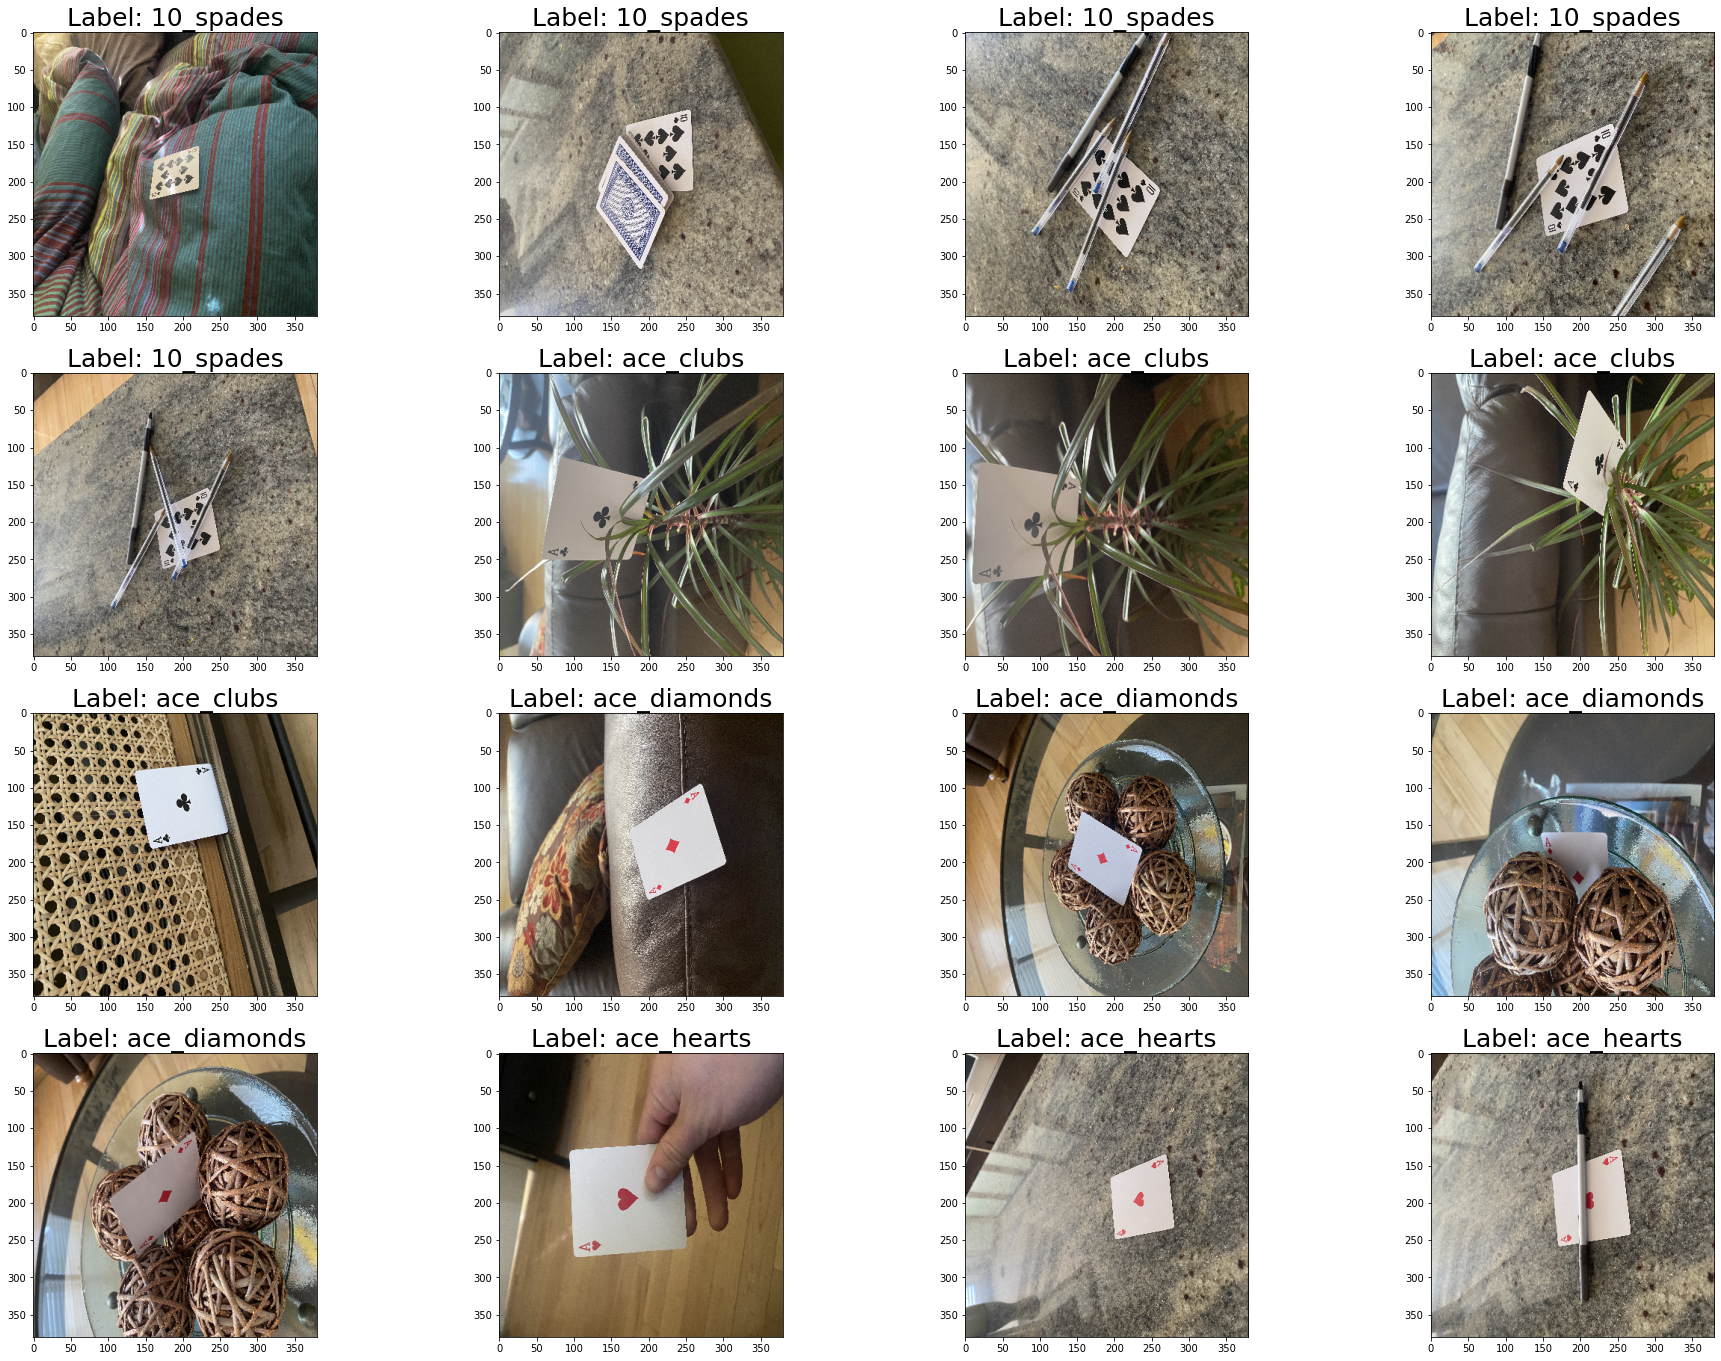

In [104]:
plt.figure(figsize = (32,24))
Xbatch,Ybatch = test_generator.__getitem__(10)

for ii in range(int(bs)):
    plt.subplot(4,4,ii+1)
    plt.imshow((Xbatch[ii]- Xbatch[ii].min())/(Xbatch.max() - Xbatch[ii].min()), cmap = "gray")
    class_idx = int(Ybatch[ii].argmax())
    plt.title("Label: {}".format(classes_names[class_idx]), fontsize=25)
plt.show()

In [ ]:
predict = model.predict(test_generator, verbose = 1)


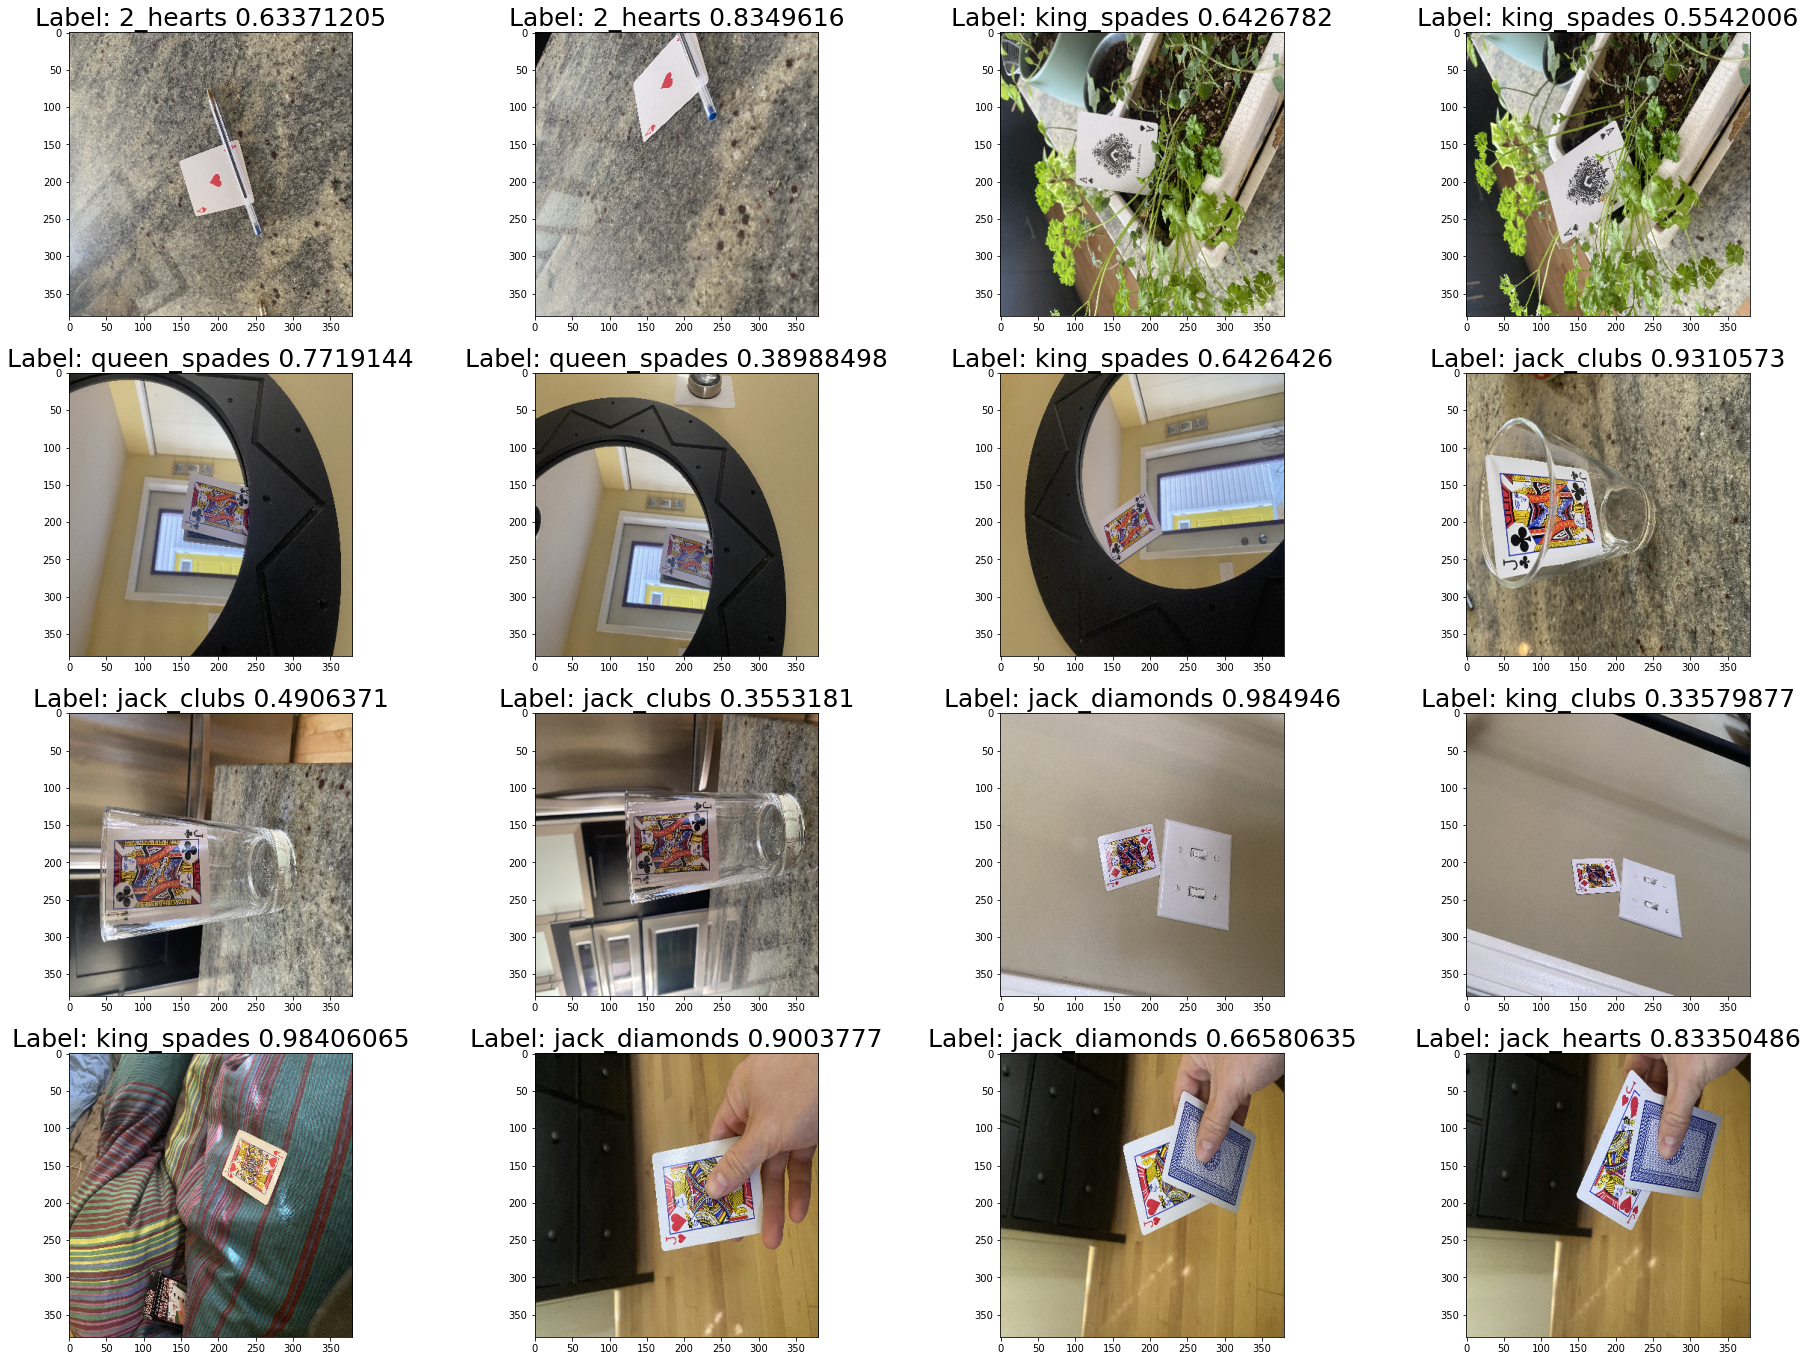

In [85]:
plt.figure(figsize = (32,24))
batch_num = 11
Xbatch,Ybatch = test_generator.__getitem__(batch_num)

for ii in range(int(bs)):
    plt.subplot(4,4,ii+1)
    plt.imshow((Xbatch[ii]- Xbatch[ii].min())/(Xbatch.max() - Xbatch[ii].min()), cmap = "gray")
    class_idx = int(predict[ii +(batch_num*bs)].argmax())
    plt.title("Label: {}".format(classes_names[class_idx] + " " + str(predict[ii +(batch_num*bs)].max())), fontsize=25)
plt.show()


In [103]:
eval = model.evaluate(test_generator, verbose = 1)


15/15 [==============================] - 14s 740ms/step - loss: 2.1169 - accuracy: 0.6190


In [43]:
import pandas as pd
pred_value = np.max(predict,axis = 1)
pred_idx = (np.argmax(predict,axis = 1)).astype(int).transpose()
pred_class = [classes_names[i] for i in pred_idx]
df = pd.DataFrame(data=pred_idx,columns= ['idx'])
df['pred_class'] = pred_class
df['pred_value'] =  pred_value
df['file_name'] = filenames
df.head()

idx   pred_class  pred_value             file_name
0    0      2_clubs    0.494562  2_clubs\IMG_6891.JPG
1    0      2_clubs    0.999331  2_clubs\IMG_6892.JPG
2    7     3_spades    0.465245  2_clubs\IMG_6932.JPG
3   43  jack_spades    0.616802  2_clubs\IMG_6933.JPG
4   40   jack_clubs    0.965044  2_clubs\IMG_6934.JPG

In [ ]:
df.to_csv('dataset_new_test.csv', index=True)

## Single image test

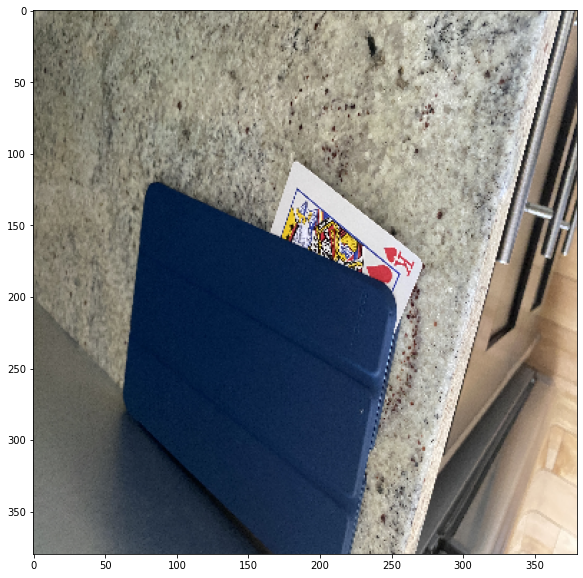

In [44]:
from keras.preprocessing import image
img_path  = "dataset_test_hard/king_hearts/IMG_7008.jpg"
img = image.load_img(img_path, target_size=(img_width, img_height))
plt.figure(figsize = (10,10))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])


In [45]:
pred = model.predict(images, batch_size=10, verbose =1)
print('Predicted card:',classes_names[np.argmax(pred)])
print('certainty', pred[0][np.argmax(pred)]*100,"%")

ValueError: in user code:

    File "C:\Users\DrewBurritt\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\DrewBurritt\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\DrewBurritt\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\DrewBurritt\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "C:\Users\DrewBurritt\anaconda3\envs\tf_gpu\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\DrewBurritt\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model_2" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 380, 380, 3)
